### Sales Analysis

In [1]:
import pandas as pd
import os 

In [2]:
df = pd.read_csv("A:\Pandas-Data-Science-Tasks-446b0018a17ad2e3c90e40d37cfabcc133eff578\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv")

#### Merging 12months of sales data into a single file

In [3]:
df = pd.read_csv("A:\Pandas-Data-Science-Tasks-446b0018a17ad2e3c90e40d37cfabcc133eff578\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv")
files = [file for file in os.listdir("A:\Pandas-Data-Science-Tasks-446b0018a17ad2e3c90e40d37cfabcc133eff578\\SalesAnalysis\\Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("A:\Pandas-Data-Science-Tasks-446b0018a17ad2e3c90e40d37cfabcc133eff578\\SalesAnalysis\\Sales_Data\\"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop NaN rows

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how= 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Convert columns' type

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make it int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make it float

#### Augment data with additional columns

In [8]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [9]:
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a city column

In [10]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


#### Question 1: What is the overall sales trend

In [11]:
all_data['Order Date'].min()

'01/01/19 03:07'

In [12]:
all_data['Order Date'].max()

'12/31/19 23:53'

In [13]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


#### Question 2: What are the top 10 products by sales?

In [14]:
all_data['Product']

0               USB-C Charging Cable
2         Bose SoundSport Headphones
3                       Google Phone
4                   Wired Headphones
5                   Wired Headphones
                     ...            
186845        AAA Batteries (4-pack)
186846                        iPhone
186847                        iPhone
186848        34in Ultrawide Monitor
186849          USB-C Charging Cable
Name: Product, Length: 185950, dtype: object

In [15]:
prod_sold= pd.DataFrame(all_data.groupby('Product').sum()['Sales'])

In [16]:
prod_sold= prod_sold.sort_values('Sales', ascending= False)

In [17]:
prod_sold[:10]

,Sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


#### Question 3: What product sold out the most? and why?

In [18]:
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


In [33]:
results= all_data.groupby('Month').sum()

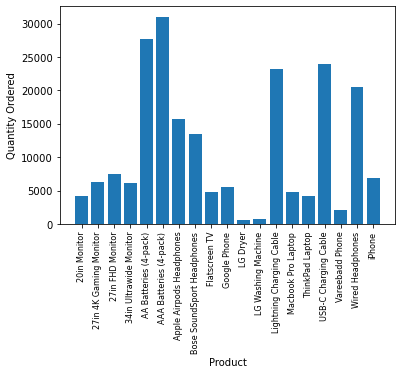

In [34]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

In [35]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_20900\3600924600.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=8)


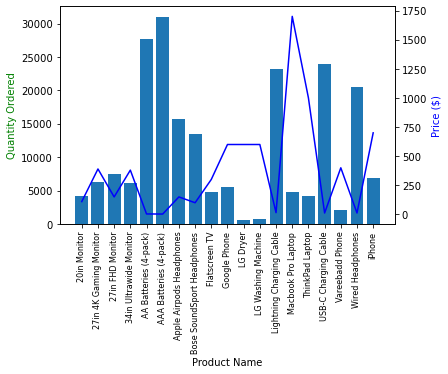

In [36]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color= 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)

plt.show()

#### Question 4: What was the best month for sales? How much was earned that month?

In [29]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [30]:
results= all_data.groupby('Month').sum()

In [31]:
import matplotlib.pyplot as plt

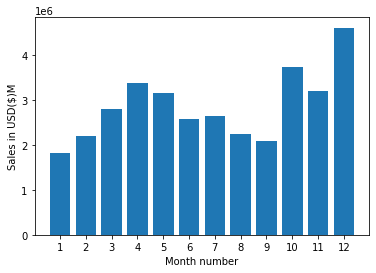

In [32]:
import matplotlib.pyplot as plt
months = range (1, 13)
plt.bar (months, results ['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)M')
plt.xlabel('Month number')
plt.show()

#### Question 5: What city had the highest number of sales?

In [37]:
results= all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta(GA),16602,2779908.20,104794,2795498.58
Austin(TX),11153,1809873.61,69829,1819581.75
Boston(MA),22528,3637409.77,141112,3661642.01
Dallas(TX),16730,2752627.82,104620,2767975.40
Los Angeles(CA),33289,5421435.23,208325,5452570.80
New York City(NY),27932,4635370.83,175741,4664317.43
Portland(ME),2750,447189.25,17144,449758.27
Portland(OR),11303,1860558.22,70621,1870732.34
San Francisco(CA),50239,8211461.74,315520,8262203.91


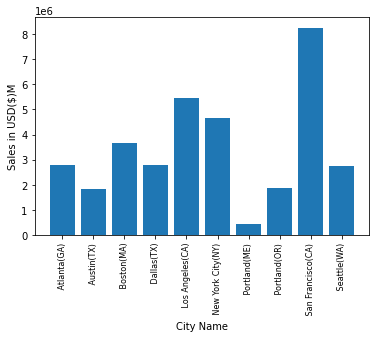

In [38]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar (cities, results ['Sales'])
plt.xticks(cities, rotation= 'vertical', size=8)
plt.ylabel('Sales in USD($)M')
plt.xlabel('City Name')
plt.show()

#### Question 6: What time should we display advertisments to maximize likelihood of customers buying product?

In [41]:
all_data['Order Date']= pd.to_datetime(all_data["Order Date"])

In [42]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27,1


#### Question 7: What products are most often sold together?

In [25]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20900\2184943785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [43]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
